In [30]:
import Analyzer
import matplotlib.pyplot as plt
import numpy as np

In [31]:
mk = Analyzer.MarketDB()

In [56]:
price_df = mk.get_daily_price('SK하이닉스', '2019-01-01')
price_df

end_date is initialized to '2022-02-02'


,code,date,open,high,low,close,diff,volume
date,,,,,,,,
2019-01-02,000660,2019-01-02,61300,61400,60000,60600,100,1934295
2019-01-03,000660,2019-01-03,60200,60300,57500,57700,2900,3337621
2019-01-04,000660,2019-01-04,57500,58500,56700,58300,600,3388087
2019-01-07,000660,2019-01-07,59000,59700,58400,58700,400,2273750
2019-01-08,000660,2019-01-08,57900,60500,57600,59200,500,3062192
...,...,...,...,...,...,...,...,...
2022-01-24,000660,2022-01-24,116500,120500,116500,119000,0,4883822
2022-01-25,000660,2022-01-25,118000,120000,116500,118000,1000,5702595
2022-01-26,000660,2022-01-26,119000,119500,117500,117500,500,3416240


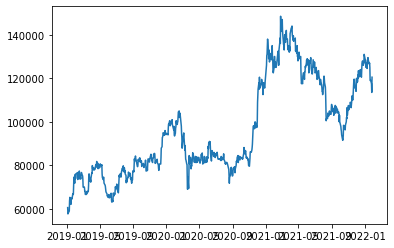

In [57]:
plt.plot(price_df['close'])
plt.show()

In [58]:
price_df['range'] = (price_df['high'] - price_df['low']) * 0.5
price_df['target'] = price_df['open'] + price_df['range'].shift(1)

In [59]:
price_df['ror'] = np.where(price_df['high'] > price_df['target'],
                          price_df['close'] / price_df['target'],1)

In [60]:
price_df['total'] = price_df['ror'].cumprod()

In [61]:
print(price_df['total'])

date
2019-01-02    1.000000
2019-01-03    1.000000
2019-01-04    1.000000
2019-01-07    1.000000
2019-01-08    1.011102
                ...   
2022-01-24    1.196024
2022-01-25    1.196024
2022-01-26    1.196024
2022-01-27    1.196024
2022-01-28    1.208561
Name: total, Length: 762, dtype: float64


In [62]:
# 성과 지표 계산 (거래년수, 총 수익)

In [63]:
trade_year = int(len(price_df.index)/252)
result = round((price_df['total'].iat[-1] / price_df['total'].iat[0] -1) * 100 , 3)

In [64]:
print(trade_year, result)

3 20.856


In [70]:
# CAGR 계산

total_profit = (price_df['total'].iat[-1] / price_df['total'].iat[0])
cagr = round((total_profit ** (1/trade_year)-1) * 100 , 2)

#MDD계산
arr_v = np.array(price_df['total'])
peak_lower = np.argmax(np.maximum.accumulate(arr_v)- arr_v)
peak_upper = np.argmax(arr_v[:peak_lower])

mdd = round((arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper] * 100, 3)

In [71]:
print(cagr, mdd)

6.52 -20.396


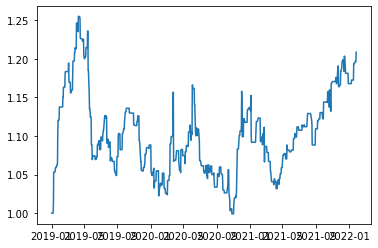

In [72]:
plt.plot(price_df['total'])
plt.show()